In [ ]:
import pandas as pd
df = pd.read_csv('/content/Restaurant reviews.csv')

Sentiment Analysis

In [ ]:
from textblob import TextBlob
# Function to calculate sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity
# Apply sentiment analysis to the 'Review' column
df['Sentiment'] = df['Review'].apply(get_sentiment)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


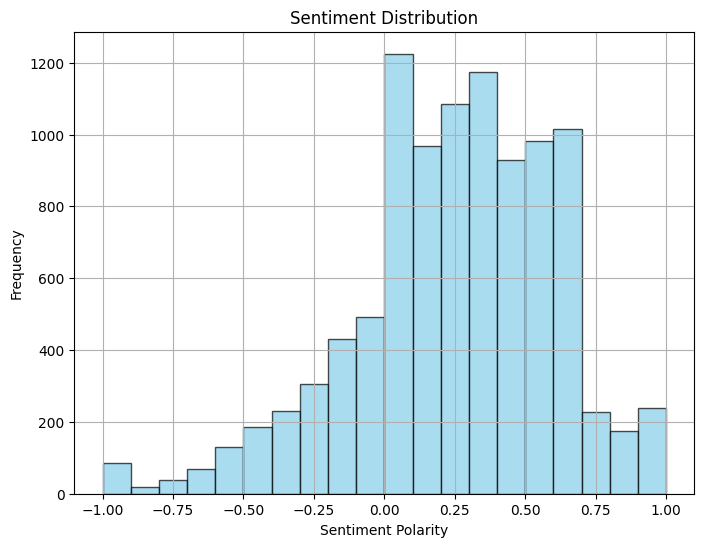

In [ ]:
import matplotlib.pyplot as plt
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
df['Sentiment'].hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Analyze sentiment statistics
sentiment_stats = df['Sentiment'].describe()
print("Sentiment Statistics:")
print(sentiment_stats)

Sentiment Statistics:
count    10000.000000
mean         0.249614
std          0.364613
min         -1.000000
25%          0.000000
50%          0.276339
75%          0.503571
max          1.000000
Name: Sentiment, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-0e9c224d678b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beyond_flavours_df['Sentiment'] = beyond_flavours_df['Review'].apply(get_sentiment)


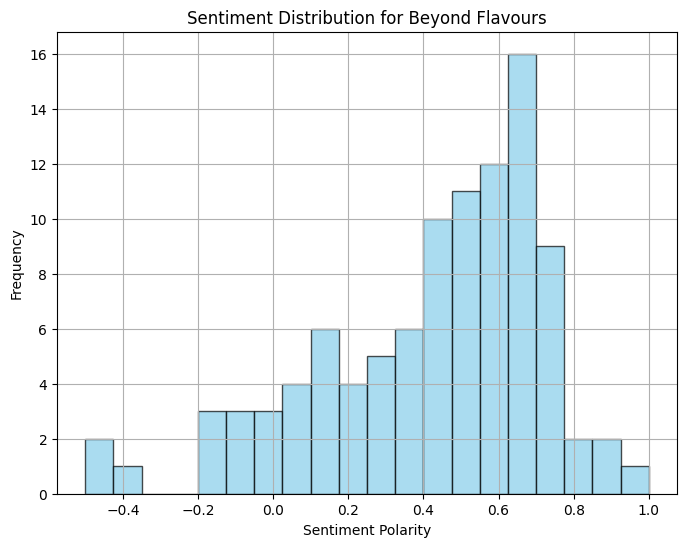

In [ ]:
# Filter reviews for the restaurant 'Beyond Flavours'
beyond_flavours_df = df[df['Restaurant'] == 'Beyond Flavours']

# Function to calculate sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Apply sentiment analysis to the filtered reviews
beyond_flavours_df['Sentiment'] = beyond_flavours_df['Review'].apply(get_sentiment)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
beyond_flavours_df['Sentiment'].hist(bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Sentiment Distribution for Beyond Flavours')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Analyze sentiment statistics
sentiment_stats = beyond_flavours_df['Sentiment'].describe()
print("Sentiment Statistics for Beyond Flavours:")
print(sentiment_stats)

Sentiment Statistics for Beyond Flavours:
count    100.000000
mean       0.419231
std        0.305174
min       -0.500000
25%        0.233333
50%        0.518500
75%        0.653021
max        1.000000
Name: Sentiment, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic Modeling

In [ ]:
from gensim import corpora, models
import gensim

# Tokenize the reviews
tokenized_reviews = df['Review'].astype(str).apply(lambda x: x.split())

# Create a dictionary
dictionary = corpora.Dictionary(tokenized_reviews)

# Create a document-term matrix
corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

# Build the LDA model
lda_model = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

# Print topics and their keywords
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.023*"the" + 0.016*"was" + 0.015*"and" + 0.014*"I" + 0.012*"to" + 0.012*"in" + 0.011*"for" + 0.011*"with" + 0.011*"a" + 0.009*"it"
Topic: 1 
Words: 0.043*"and" + 0.041*"the" + 0.019*"is" + 0.018*"a" + 0.017*"to" + 0.016*"of" + 0.013*"I" + 0.013*"for" + 0.011*"was" + 0.011*"with"
Topic: 2 
Words: 0.032*"was" + 0.031*"the" + 0.024*"and" + 0.021*"a" + 0.018*"is" + 0.016*"to" + 0.013*"The" + 0.012*"in" + 0.012*"of" + 0.011*"for"
Topic: 3 
Words: 0.035*"the" + 0.028*"to" + 0.025*"and" + 0.017*"was" + 0.016*"I" + 0.016*"a" + 0.013*"of" + 0.012*"The" + 0.011*"is" + 0.011*"for"
Topic: 4 
Words: 0.030*"and" + 0.026*"the" + 0.023*"was" + 0.020*"of" + 0.017*"is" + 0.016*"good" + 0.014*"with" + 0.014*"a" + 0.013*"to" + 0.011*"The"


In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.1 MB/s eta 0:00:00


In [ ]:
import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.017508  0.011815       1        1  41.894603
2      0.014409 -0.000686       2        1  25.167956
3      0.012593  0.027209       3        1  18.465706
4      0.008462 -0.041841       4        1  10.359403
0     -0.052972  0.003503       5        1   4.112331, topic_info=     Term          Freq         Total Category  logprob  loglift
33    was   9448.000000   9448.000000  Default  30.0000  30.0000
50    the  17449.000000  17449.000000  Default  29.0000  29.0000
51     to   9118.000000   9118.000000  Default  28.0000  28.0000
77      I   6098.000000   6098.000000  Default  27.0000  27.0000
12    and  16328.000000  16328.000000  Default  26.0000  26.0000
..    ...           ...           ...      ...      ...      ...
556    on     74.266510   2431.493485   Topic5  -5.6226  -0.2974
22   good     89.093008   3917.258877   Topic5  -5.4405  -0.5923
19   food     85.617762   3606.795862   Topic5  -5.4803  -0.5495
7     The     88.271395   4663.484805   Topic5  -5.4498  -0.7759
784  have     72.445323   2887.648940   Topic5  -5.6474  -0.4942

[456 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
27752      1  0.170449   'the
27752      3  0.681798   'the
36275      1  0.837362  *Best
33916      4  0.769703     ,i
36         1  0.481724      -
...      ...       ...    ...
23802      4  0.059919      ➖
23802      5  0.778953      ➖
10914      1  0.084146      🍔
10914      3  0.673172      🍔
10914      4  0.168293      🍔

[838 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 4, 5, 1])